In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

import warnings 
warnings.filterwarnings("ignore", category=Warning)

## 0. Загрузка и обзор данных

In [2]:
data = pd.read_excel("отзывы за лето.xls")
data.head()

,Rating,Content,Date
0,5,It just works!,2017-08-14
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14
2,5,Отлично все,2017-08-14
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14
4,5,"Очень удобно, работает быстро.",2017-08-14


In [3]:
data['Rating'].value_counts()

5    14586
1     2276
4     2138
3      911
2      748
Name: Rating, dtype: int64

In [4]:
data = data[data['Rating'] != 3]
data['target'] = data['Rating'] > 3
data['target'] = data['target'].astype(int)

In [5]:
data['target'].value_counts()

1    16724
0     3024
Name: target, dtype: int64

**Положительные отзывы:**

In [6]:
data.loc[data['target'] == 1, 'Content'].sample(20, random_state=42)

19216                                  Спасибо, все удобно
12380                                                   Ok
953                                                Отлично
15329                                     Удобное спасибо!
12421                                  Отличное приложение
17805                                                   Ок
8245                                                  норм
7299                                               отлично
5504                              Очень удобное приложение
19928                                              Отлично
12680    Заходить в приложение стало в 2 раза дольше,фу...
7209                Не могу скачать приложение, ошибка 963
12721                 Всё отлично!приложение очень радует!
10057                                Удобно.Быстро.Надежно
3191                                Очень просто и быстро.
5886     Мне понравилось очень удобно сидиш дома и все ...
10309    Перестало заходить, причем именно дома по wi f.

**Отрицательные отзывы:**

In [7]:
data.loc[data['target'] == 0, 'Content'].sample(20, random_state=42)

20636                     Дайте доступ к роот правам, с*ки
2226     По три раза просит пароль задолбал исправьте п...
13980    Ну задолбало уже по 2-3 раза вводить пароль дл...
13173    Если честно - дерьмо Ваше приложение! Исправьт...
8452                             Не приходит СМС с паролем
10162    В шаблонах чехарда появляются записи из Контак...
506      Куда подевалось вход по отпечатку? При запуске...
17032    Все было хорошо недавно перестало работать из....
11215    Не устанавливается приложение!Раньше все было ...
3582     Установил приложение. Зарегистрироваться так и...
20173    У меня тоже телефон meizu pro 6. И тоже пишет ...
9355     Почему у сбера переводы длятся вечность? Польз...
8580     Здравствуйте. После последнего обновления стал...
1742     При регистрации не могу ввести разовый пароль ...
456      Разрабы тупые рукожопы! Наковыряли в обновлени...
15358    Не могу войти на свой счет и зарегать новый не...
20115    Очень медленное приложение в начале загрузки, .

## 1. Обработка текстов

In [8]:
import nltk
from pymorphy2 import MorphAnalyzer

Ограничимся минимальной очисткой текстов - только от точек, запятых и предлогов:

In [9]:
punctuation = r'[,.]'
morpher = MorphAnalyzer()

stop = {'без', 'безо', 'близ', 'в', 'во', 'вместо', 'вне',
        'для', 'до', 'за', 'из', 'изо', 'из-за', 'из-под', 
        'к', 'ко', 'кроме', 'между', 'меж', 'на', 'над', 'надо',
        'о', 'об', 'обо', 'от', 'ото', 'перед', 'передо', 'пред', 'предо',
        'пo', 'под', 'подо', 'при', 'про', 'ради', 'с', 'со',
        'сквозь', 'среди', 'у', 'через', 'чрез'}

Функции для обработки текстов:

In [10]:
def normalize_text(text_list):
    return [morpher.parse(word)[0].normal_form \
            for word in text_list if word not in stop]

def preprocess_text(text):    
    text_list = nltk.word_tokenize(str(text))
    text_list = normalize_text(text_list)
    return text_list

Обработка текстов:

In [11]:
data['Text'] = data['Content'].str.lower()
data['Text'] = data['Text'].str.replace(r'[.,]', ' ')
data['Text'] = [preprocess_text(text_list) for text_list in tqdm(data['Text'])]

100%|███████████████████████████████████| 19748/19748 [01:06<00:00, 296.06it/s]


Датафрейм с обработанными текстами:

In [12]:
data['Text'] = data['Text'].str.join(' ')
data.head(n=10)

,Rating,Content,Date,target,Text
0,5,It just works!,2017-08-14,1,it just works !
1,4,В целом удобноное приложение...из минусов хотя...,2017-08-14,1,целое удобноной приложение минус хотеть слишко...
2,5,Отлично все,2017-08-14,1,отлично весь
3,5,Стал зависать на 1% работы антивируса. Дальше ...,2017-08-14,1,стать зависать 1 % работа антивирус далёкий ни...
4,5,"Очень удобно, работает быстро.",2017-08-14,1,очень удобно работать быстро
5,5,Всё удобно норм 👍👍👍,2017-08-14,1,весь удобно норма 👍👍👍
6,5,Очень удобное приложение.,2017-08-14,1,очень удобный приложение
7,5,Все устраивает,2017-08-14,1,весь устраивать
8,5,У меня работает все четко. В отличии от банком...,2017-08-14,1,я работать весь чётко отличие банкомат который...
9,5,Очень все хорошо👍,2017-08-14,1,очень весь хорошо👍


## 2. Векторизация текстов и обучение логистической регрессии

In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier

Выборка и её разделение:

In [14]:
X = data['Text']
y = data['target']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

Мешок слов из 5000 самых частотных униграмм, биграмм и триграмм:

In [16]:
vectorizer = CountVectorizer(ngram_range=(1, 3), max_features=5000)

Векторизация выборок:

In [17]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

Логистическая регрессия с L1-регуляризацией (с выбором C по кросс-валидации):

In [18]:
lr = LogisticRegressionCV(
    cv=3,
    penalty='l1',
    scoring='f1',
    solver='saga',
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

In [19]:
%%time
lr.fit(X_train_vectorized, y_train)

Wall time: 4min 1s


LogisticRegressionCV(Cs=10, class_weight='balanced', cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=-1, penalty='l1',
                     random_state=42, refit=True, scoring='f1', solver='saga',
                     tol=0.0001, verbose=0)

Вероятностное предсказание:

In [20]:
y_lr_proba = lr.predict_proba(X_test_vectorized)
y_lr_proba = y_lr_proba[:, 1]

Вспомогательные функции для калибровки вероятностного порога и проверки качества предсказания:
    <br>**взяты из курса ранее*

In [21]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

In [22]:
def get_classification_report(y_test_true, y_test_pred):
    print(classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    crosstab = pd.crosstab(y_test_true, y_test_pred)
    crosstab.index = pd.Index([0, 1], name='true')
    crosstab.columns = pd.Index([0, 1], name='pred')
    print(crosstab)

Оптимальный вероятностный порог - 0.3:

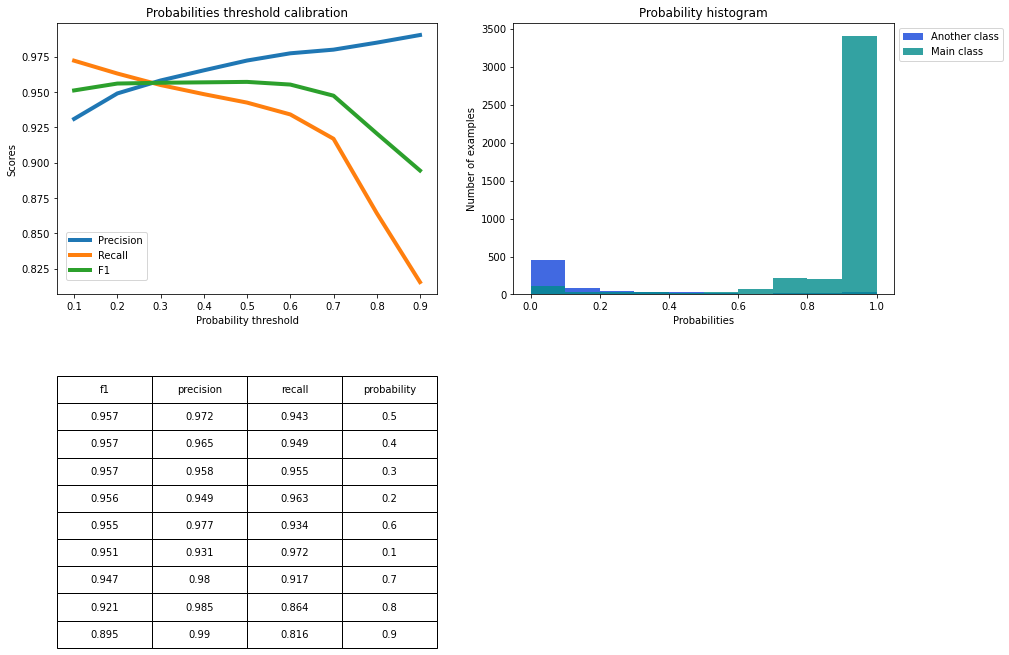

In [23]:
show_proba_calibration_plots(y_lr_proba, y_test)

Метрики качества предсказания логистической регрессии на тесте с таким порогом:

In [24]:
get_classification_report(y_test, y_lr_proba > 0.3)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       756
           1       0.96      0.96      0.96      4181

    accuracy                           0.93      4937
   macro avg       0.86      0.86      0.86      4937
weighted avg       0.93      0.93      0.93      4937

CONFUSION MATRIX

pred    0     1
true           
0     582   174
1     188  3993


## 3. Отбор топ-1000 признаков

**Зачем?** Для быстроты (и качества) обучения модели бустинга отберем топ-1000 признаков по весам, найденными моделью логистической регресии с L1-регуляризацией.

Датафрейм со словами, соответствующими признакам в модели векторайзера, и их весами от логистической регрессии:

In [25]:
feature_weights = pd.DataFrame(
    {'feature_names': vectorizer.get_feature_names(),
     'lr_coef': lr.coef_.ravel()}
    )

Отсортируем датафрейм по абсолютным значениям весов и выберем индексы топ-1000 признаков.
Отсортируем датафрейм снова, чтобы посмотреть, какие слова определяют положительный отзыв (сверху), а какие - отрицательный (снизу). Мы же исключили слова из середины такого ранжирования - с околонулевыми весами.

In [26]:
top1000 = feature_weights['lr_coef'].abs().sort_values(ascending=False).head(n=1000).index.values
feature_weights.iloc[top1000, :].sort_values(by='lr_coef', ascending=False)

,feature_names,lr_coef
2275,ок,5.204294
4407,удобно,4.395251
1463,класс,4.186748
2451,отличный,4.024734
4736,хорошо,3.739721
2426,отлично,3.664086
263,бывать,3.445068
2140,норма,3.392685
1889,не плохо,3.341956
4070,супер,3.263559


Отбираем по индексам топ-1000 векторизованных признаков:

In [27]:
X_train_selected = X_train_vectorized[:, top1000]
X_test_selected = X_test_vectorized[:, top1000]

## 4. Обучение модели бустинга

Обучаем модель CatBoostClassifier из коробки на отобранных топ-1000 признаках:

In [28]:
catb = CatBoostClassifier(eval_metric='F1', silent=True, random_state=42)
%time catb.fit(X_train_selected, y_train);

Wall time: 1min 13s


Получение вероятностного предсказания и его калибровка:

In [29]:
y_catb_proba = catb.predict_proba(X_test_selected)
y_catb_proba = y_catb_proba[:, 1]

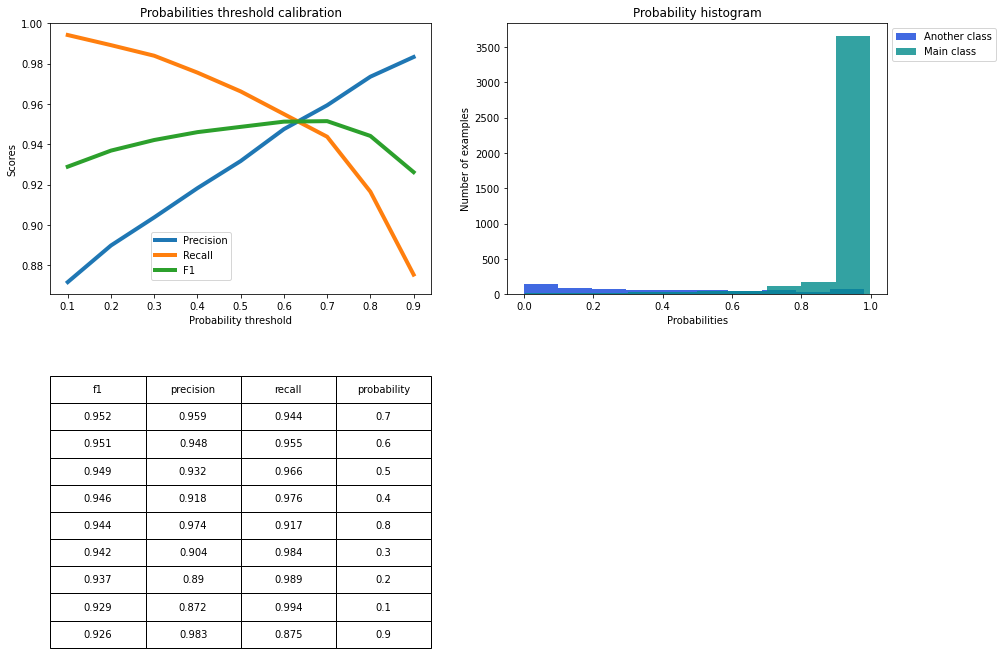

In [30]:
show_proba_calibration_plots(y_catb_proba, y_test)

Метрики качества предсказания модели бустинга на тесте с оптимальным порогом 0.7:

In [31]:
get_classification_report(y_test, y_catb_proba > 0.7)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75       756
           1       0.96      0.94      0.95      4181

    accuracy                           0.92      4937
   macro avg       0.84      0.86      0.85      4937
weighted avg       0.92      0.92      0.92      4937

CONFUSION MATRIX

pred    0     1
true           
0     589   167
1     235  3946


Метрики, конечно. немного ухудшились, но не сильно.

Добавим важности признаков в датафрейм к соответствующим им словам и упорядочим:

In [32]:
feature_weights['catb_fi'] = 0
feature_weights.iloc[top1000, 2] = catb.feature_importances_
feature_weights.sort_values(by='catb_fi', ascending=False).head(n=20)

,feature_names,lr_coef,catb_fi
4407,удобно,4.395251,32.883081
1795,не,-1.129072,12.069638
4502,удобный,2.398425,4.653658
2155,нравиться,3.242656,3.562036
2575,очень удобно,2.259458,3.369574
2451,отличный,4.024734,2.359529
2426,отлично,3.664086,2.288544
3949,спасибо,2.478015,2.157656
2203,обновление,-1.333716,2.018223
132,антивирус,-1.420767,1.705715


Можно сказать, что по большей части в положительных отзывах приложение хвалят (за удобство и т.д.) и благодарят разработчиков, а в отрицательных - жалуются на вылетание, антивирус, обновление прошивки и проблему с root.